In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# more visualization
import seaborn as sns

Can I predict happiness?

In [ ]:
df_2019 = pd.read_csv("happiness_real_data.csv")

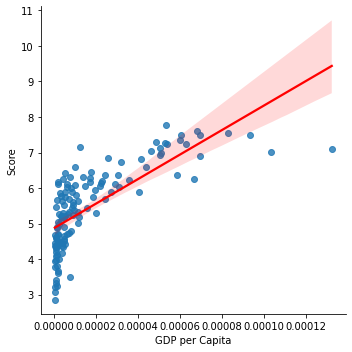

In [ ]:
sns.lmplot(x='GDP per Capita', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

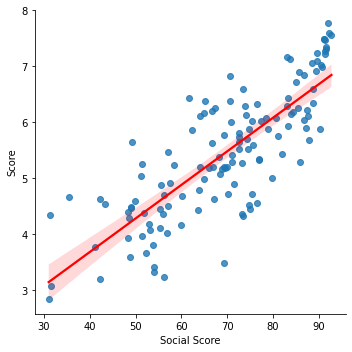

In [ ]:
sns.lmplot(x='Social Score', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

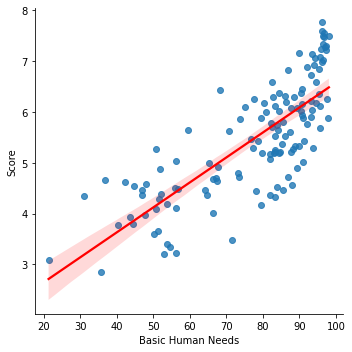

In [ ]:
sns.lmplot(x='Basic Human Needs', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

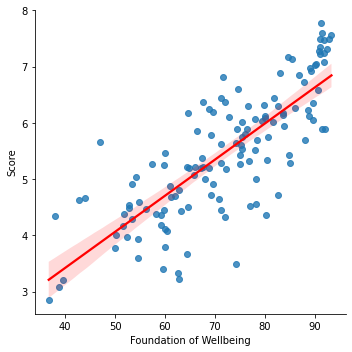

In [ ]:
sns.lmplot(x='Foundation of Wellbeing', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

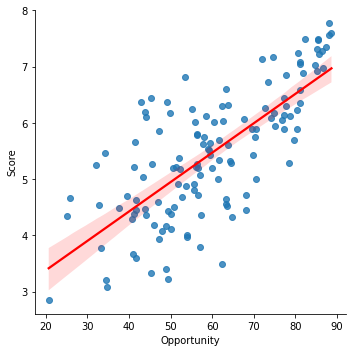

In [ ]:
sns.lmplot(x='Opportunity', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

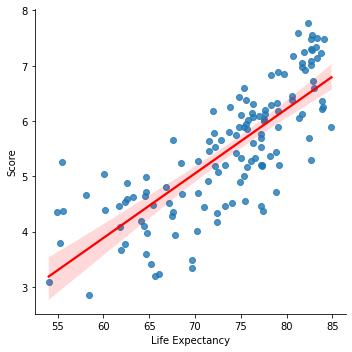

In [ ]:
sns.lmplot(x='Life Expectancy', y='Score', data=df_2019, fit_reg=True, line_kws={'color': 'red'}) 

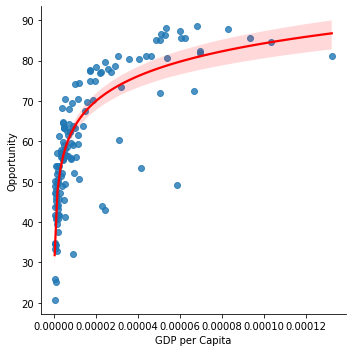

In [ ]:
sns.lmplot(x='GDP per Capita', y='Opportunity', data=df_2019,logx=True, line_kws={'color': 'red'}) 

In [ ]:
# Split data 2019 into train test 
y = df_2019["Score"]
X = df_2019.drop("Score", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Linear Regression
# calculate estimate of test error for a given feature set
def get_cv_error(features):

  if len(features[1]) != 0:
    ct = make_column_transformer(
        (OneHotEncoder(), features[1]),
        remainder="passthrough"      
    )
    pipeline = make_pipeline(
        ct,
        StandardScaler(),
        LinearRegression()
    )
  else:
    pipeline = make_pipeline(
        StandardScaler(),
        LinearRegression()
        )

  # calculate errors from cross-valiation
  cv_errs = cross_val_score(pipeline, X=X_train[features[0] + features[1]], 
                             y=y_train,
                             scoring="r2", cv=10)
  
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# features
f = [[["GDP (Billions)"], []],
  [['GDP per Capita'], []],
  [['Social Score'], []] ,
  [['Basic Human Needs'], []],
  [['Foundation of Wellbeing'], []],
  [['Opportunity'], []],
  [['Life Expectancy'], []],
  [["GDP per Capita", 'Social Score', "Life Expectancy"], []],
  [['Social Score', "Basic Human Needs", "Foundation of Wellbeing", "Opportunity"], []],
  [["GDP per Capita", 'Social Score', "Life Expectancy"], ["Region"]],
  [["GDP per Capita", 'Social Score', "Life Expectancy", "lat"], ["Region"]]]

# calculate and store errors for different feature sets
errs = pd.Series()
for features in f:
  errs[str(features)] = get_cv_error(features)

errs.sort_values(ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


[['GDP (Billions)'], []]                                                                -0.698355
[['GDP per Capita'], []]                                                                 0.393025
[['Opportunity'], []]                                                                    0.468700
[['Basic Human Needs'], []]                                                              0.562535
[['Social Score', 'Basic Human Needs', 'Foundation of Wellbeing', 'Opportunity'], []]    0.585650
[['Life Expectancy'], []]                                                                0.587821
[['Foundation of Wellbeing'], []]                                                        0.590190
[['Social Score'], []]                                                                   0.604730
[['GDP per Capita', 'Social Score', 'Life Expectancy'], ['Region']]                      0.666587
[['GDP per Capita', 'Social Score', 'Life Expectancy'], []]                              0.667722
[['GDP per Capita', 

In [ ]:
# Knearest Neighbors
# calculate estimate of test error for a given feature set
def get_cv_error(features):

  if len(features[1]) != 0:
    ct = make_column_transformer(
        (OneHotEncoder(), features[1]),
        remainder="passthrough"      
    )
    pipeline = make_pipeline(
        ct,
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=4)
    )
  else:
    pipeline = make_pipeline(
        StandardScaler(),
        KNeighborsRegressor(n_neighbors=5)
        )

  # calculate errors from cross-valiation
  cv_errs = cross_val_score(pipeline, X=X_train[features[0] + features[1]], 
                             y=y_train,
                             scoring="r2", cv=10)
  
  # calculate average of the cross-validation errors
  return cv_errs.mean()

# calculate and store errors for different feature sets
errs = pd.Series()
for features in f:
  errs[str(features)] = get_cv_error(features)

errs.sort_values(ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


[['GDP (Billions)'], []]                                                                 0.234347
[['Opportunity'], []]                                                                    0.422894
[['Foundation of Wellbeing'], []]                                                        0.508452
[['Life Expectancy'], []]                                                                0.515431
[['GDP per Capita'], []]                                                                 0.541171
[['Social Score'], []]                                                                   0.561265
[['Basic Human Needs'], []]                                                              0.570699
[['GDP per Capita', 'Social Score', 'Life Expectancy'], ['Region']]                      0.610375
[['GDP per Capita', 'Social Score', 'Life Expectancy', 'lat'], ['Region']]               0.617992
[['Social Score', 'Basic Human Needs', 'Foundation of Wellbeing', 'Opportunity'], []]    0.627064
[['GDP per Capita', 

1     0.542896
11    0.564051
12    0.567916
10    0.568801
13    0.570312
15    0.574703
14    0.576569
16    0.577931
17    0.580167
9     0.583898
18    0.586411
19    0.587615
8     0.592242
7     0.594347
6     0.599891
5     0.599956
4     0.617992
2     0.623878
3     0.636267
dtype: float64

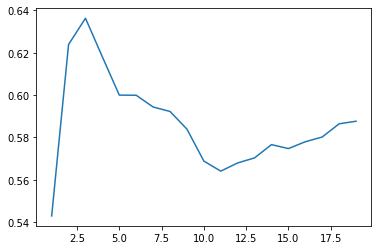

In [ ]:
X_train = X_train[["GDP per Capita", 'Social Score', "Life Expectancy", "lat", "Region"]]

# calculate estimate of test error for a value of k
def get_cv_error(k):
  # define pipeline
  ct = make_column_transformer(
        (OneHotEncoder(), ["Region"]),
        remainder="passthrough"      
    )
  pipeline = make_pipeline(
      ct,
      StandardScaler(),
      KNeighborsRegressor(n_neighbors=k)
    )
  # calculate errors from cross-validation
  cv_errs = cross_val_score(pipeline, X=X_train, y=y_train,
                             scoring="r2", cv=10)
  # calculate average of the cross-validation errors
  return cv_errs.mean()
    
ks = pd.Series(range(1, 20))
ks.index = range(1, 20)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

In [ ]:
from sklearn.model_selection import GridSearchCV

# define pipeline
ct = make_column_transformer(
        (OneHotEncoder(), ["Region"]),
        remainder="passthrough"      
    )

pipeline = make_pipeline(
    ct,
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=6)
) 

grid_search = GridSearchCV(pipeline,
                           param_grid={
                               "kneighborsregressor__n_neighbors": range(1, 20)
                           },
                           scoring="r2",
                           cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_
grid_search.best_params_

{'kneighborsregressor__n_neighbors': 3}

Linear Regression w/ elements: [['GDP per Capita', 'Social Score', 'Life Expectancy', 'lat'], ['Region']] 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ct = make_column_transformer(
  (OneHotEncoder(), ["Region"]),
  remainder="passthrough"      
)
pipeline = make_pipeline(
  ct,
  StandardScaler(),
  LinearRegression()
)

pipeline = pipeline.fit(
    X=X_train[["GDP per Capita", 'Social Score', "Life Expectancy", "lat", "Region"]],
    y=y_train,)

p = pipeline.predict(X=X_test[["GDP per Capita", 'Social Score', "Life Expectancy", "lat", "Region"]])

r2_score(y_test, p), mean_squared_error(y_test, p)

(0.8258199252488712, 0.2172810752170805)

In [ ]:
c = ["GDP per Capita", 'Social Score', "Life Expectancy", "lat", "Region"]
us_0 = pd.DataFrame([[6.96227174503337E-05, 85.71, 79, 38, "North America"]], columns=c) # normal scores
print(pipeline.predict(X=us_0), "US - actual: 6.9")
# my model predicted a happiness score of 6.93 while actual is 6.892

# w/ 25percentile of GDP
us_1 = pd.DataFrame([[1.983754e-06, 85.71, 79, 38, "North America"]], columns=c) 
print(pipeline.predict(X=us_1), "US 25percentile GDP per Capita")

# w/ 25percentile of Social Score
us_2 = pd.DataFrame([[6.96227174503337E-05, 57, 79, 38, "North America"]], columns=c) 
print(pipeline.predict(X=us_2), "US 25percentile Social Score")

# w/ 25percentile of Life Expectancy
us_3 = pd.DataFrame([[6.96227174503337E-05, 79, 68, 38, "North America"]], columns=c) 
print(pipeline.predict(X=us_3), " US 25percentile Life Exp")


# Afghanistan one the 3rd unhappiest country:
af_0 = pd.DataFrame([[4.92562652054787E-07, 42, 66, 33, "Southern Asia"]], columns=c) 
print(pipeline.predict(X=af_0), "Afg - actual: 3.2")
# my model predict 4.07 while actual is 3.2

# 75percentile GDP
af_1 = pd.DataFrame([[2.230575e-05, 42, 66, 33, "Southern Asia"]], columns=c) 
print(pipeline.predict(X=af_1), "Afg 75percentile GDP per Capita")

# 75percentile Social Score
af_2 = pd.DataFrame([[4.92562652054787E-07, 83.145, 66, 33, "Southern Asia"]], columns=c) 
print(pipeline.predict(X=af_2), "Afg 75percentile Social Score")

# 75percentile Life Expectancy
af_3 = pd.DataFrame([[4.92562652054787E-07, 42, 79, 33, "Southern Asia"]], columns=c) 
print(pipeline.predict(X=af_3), "Afg 75percentile Life Expectancy")



[6.93949147] US - actual: 6.9
[5.94733076] US 25percentile GDP per Capita
[6.20276051] US 25percentile Social Score
[6.5574029]  US 25percentile Life Exp
[4.07728149] Afg - actual: 3.2
[4.39724777] Afg 75percentile GDP per Capita
[5.13310857] Afg 75percentile Social Score
[4.32534798] Afg 75percentile Life Expectancy


In [ ]:
df_2019.describe()

,Unnamed: 0,Overall rank,Score,GDP (Billions),Social Score,Basic Human Needs,Foundation of Wellbeing,Opportunity,Life Expectancy,population,lat,lng,GDP per Capita
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,1.340000e+02,134.000000,134.000000,1.340000e+02
mean,66.500000,76.134328,5.469343,671.337985,69.768731,77.412910,71.924104,59.968955,73.580522,5.371472e+07,22.024900,19.308930,1.726267e-05
std,38.826537,45.963174,1.138967,2529.571149,15.335755,18.118322,14.130400,16.010124,7.671875,1.737021e+08,25.457049,54.767562,2.416936e-05
min,0.000000,1.000000,2.853000,2.478000,31.060000,21.310000,36.690000,20.730000,54.022000,3.664250e+05,-41.000000,-102.000000,2.685274e-07
25%,33.250000,35.250000,4.566000,19.624750,57.017500,66.210000,61.400000,48.990000,68.024500,5.165454e+06,7.000000,-2.000000,1.983754e-06
50%,66.500000,74.500000,5.449500,66.247000,71.060000,83.380000,72.570000,58.340000,75.361000,1.185470e+07,24.500000,22.000000,5.916741e-06
75%,99.750000,115.750000,6.245500,383.964000,83.145000,90.895000,83.537500,74.007500,79.046500,3.799163e+07,42.375000,45.000000,2.230575e-05
max,133.000000,156.000000,7.769000,22939.580000,92.730000,98.070000,93.390000,88.660000,84.910000,1.402112e+09,65.000000,174.000000,1.324914e-04
